<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/summarization/Langchain_T5_base_Document_summarizer_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summarization

Summarization creates a shorter version of a document or an article that captures all the important information. Along with translation, it is another example of a task that can be formulated as a sequence-to-sequence task. Summarization can be:

Extractive: extract the most relevant information from a document.
Abstractive: generate new text that captures the most relevant information.

https://huggingface.co/docs/transformers/tasks/summarization

https://github.com/gkamradt/langchain-tutorials/blob/main/data_generation/5%20Levels%20Of%20Summarization%20-%20Novice%20To%20Expert.ipynb

https://python.langchain.com/docs/modules/data_connection/document_loaders/


In [ ]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq torch==2.1 --progress-bar off
!pip install -qqq transformers==4.34.0 --progress-bar off
!pip install -qqq accelerate==0.23.0 --progress-bar off
!pip install -qqq bitsandbytes==0.41.1 --progress-bar off
!pip install sentence-transformers spacy  trl datasets pypdf -qqq --progress-bar off
!pip install  -U langchain==0.0.309 --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.17.1 requires huggingface-hub>=0.19.4, but you have huggingface-hub 0.17.3 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.0.21 requires langsmith<0.2.0,>=0.1.0, but you have langsmith 0.0.92 which is incompatible.
langchain-core 0.1.25 requires langsmith<0.2.0,>=0.1.0, but you have langsmith 0.0.92 which is incompatible.


In [ ]:
from langchain.text_splitter import SentenceTransformersTokenTextSplitter
from langchain.document_loaders import DirectoryLoader, TextLoader

# Loaders
from langchain.schema import Document

# Splitters
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Model


# Embedding Support
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings

# Summarizer we'll use for Map Reduce
from langchain.chains.summarize import load_summarize_chain

# Data Science
import numpy as np
from sklearn.cluster import KMeans


# Import libraries
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from langchain.llms import HuggingFacePipeline
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
import transformers
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests

response = requests.get("https://www.gutenberg.org/cache/epub/64317/pg64317.txt")

In [ ]:
book_complete_text = response.text

In [ ]:
book_complete_text = book_complete_text[5:]

In [ ]:
len(book_complete_text)

296884

In [ ]:
file_path = "/content/drive/MyDrive/data/book.txt"

In [ ]:
with open(file_path, "w", encoding="utf-8") as f:
    f.write(book_complete_text)

In [ ]:

with open(file_path, "r",  encoding="utf-8") as f:
    text = f.read()

In [ ]:
text = text.replace('\t', ' ')

In [ ]:
len(text)

290101

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=4000, chunk_overlap=500)



In [ ]:
docs = text_splitter.create_documents([text])
num_documents = len(docs)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 83 documents


In [ ]:
text_summarization_pipeline = transformers.pipeline("summarization", model="olonok/olonok_billsum_model")


llm = HuggingFacePipeline(pipeline=text_summarization_pipeline )

In [ ]:
num_docs = len(docs)

num_tokens_first_doc = llm.get_num_tokens(docs[0].page_content)

print(
    f"Now we have {num_docs} documents and the first one has {num_tokens_first_doc} tokens"
)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Now we have 83 documents and the first one has 949 tokens


In [ ]:
# Set verbose=True if you want to see the prompts being used
from langchain.chains.summarize import load_summarize_chain
summary_chain = load_summarize_chain(llm=llm,
                                     chain_type="map_reduce",
                                     verbose=True)

In [ ]:
output = summary_chain.run(docs) # 13 mins



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"Project Gutenberg eBook of The Great Gatsby
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Great Gatsby


Author: F. Scott Fitzgerald

Release date: January 17, 2021 [eBook #64317]
                Most recently updated: February 2, 2024

Language: English

Credits: Produced by Alex Cabal for the Standard Ebooks project, based on a transcription produced for Project Gutenberg Australia.


*** START OF THE PROJECT GUTENBERG EBOOK 

Token indices sequence length is longer than the specified maximum sequence length for this model (1043 > 1024). Running this sequence through the model will result in indexing errors



> Finished chain.


Token indices sequence length is longer than the specified maximum sequence length for this model (7926 > 1024). Running this sequence through the model will result in indexing errors




> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. The Great Gatsby by F. Scott Fitzgerald Release date: January 17, 2021 [eBook #64317] Most recently updated: February 2, 2024 Language: English Credits: Produced by Alex Cab

"I graduated from New Haven in 1915, just a quarter of a century after my father, and a little later I participated in that delayed Teutonic migration known as the Great War. instead of being the warm centre of the world, the Middle West now seemed like the ragged edge of the universe, so I decided to go East and learn the bond business. I was a guide, a pathfinder, a

In [ ]:
print(output.strip())

the book is a collection of short stories about the life and times of the Buchanans . it is the story of a young boy who was abused by a man whose father was murdered . the book contains a selection of poems by the author . Creating the works from print editions not protected by copyright law means that no one owns a United States copyright in these works.


In [ ]:
len(output.strip())

358

In [ ]:
model_name = "sentence-transformers/gtr-t5-base"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}
embeddings = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)




vectors = embeddings.embed_documents([x.page_content for x in docs])

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/219M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [ ]:
len(vectors[0])

768

In [ ]:
num_clusters = int(len(vectors) // 4)
num_clusters

20

In [ ]:
# Assuming 'embeddings' is a list or array of 768-dimensional embeddings

# Choose the number of clusters, this can be adjusted based on the book's content.
# I played around and found ~10 was the best.
# Usually if you have 10 passages from a book you can tell what it's about
num_clusters = 5 if num_clusters <=5 else num_clusters

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_

array([17,  7, 14,  4,  6,  6,  6,  6,  6,  4,  1, 13, 13, 13, 13,  3, 13,
       19,  8,  8,  8, 16,  8,  0, 10,  8,  4, 10,  4, 12, 11, 11, 18, 13,
       18, 12,  9, 10,  0,  0, 10, 10,  7, 10,  3,  9,  9,  3, 16, 13,  9,
        9,  1,  9, 15,  3,  3,  3,  5,  5,  1,  1,  0, 10,  9, 12,  5,  5,
        5,  5, 11, 16, 11, 16, 10,  4,  1, 10,  2,  2,  2,  2,  2],
      dtype=int32)

In [ ]:
len(kmeans.labels_)

83

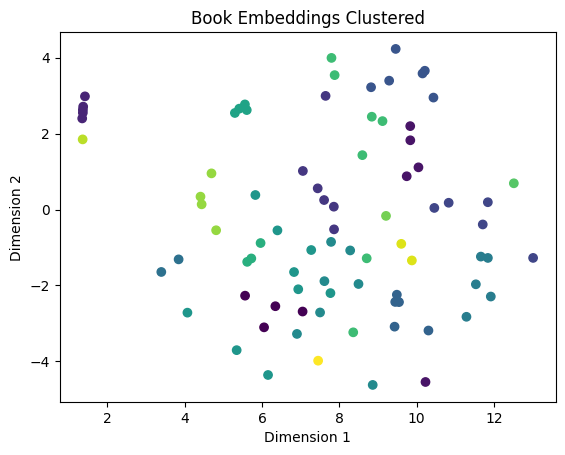

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
# Taking out the warnings
import warnings
from warnings import simplefilter

# Filter out FutureWarnings
simplefilter(action='ignore', category=FutureWarning)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(np.array(vectors))

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

In [ ]:
# Find the closest embeddings to the centroids

# Create an empty list that will hold your closest points
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):

    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)

    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)

    # Append that position to your closest indices list
    closest_indices.append(closest_index)

In [ ]:
selected_indices = sorted(closest_indices)
selected_indices

[0, 1, 2, 8, 16, 17, 18, 32, 41, 50, 52, 54, 55, 62, 65, 68, 70, 71, 75, 78]

In [ ]:
# Import libraries
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
from langchain.llms import HuggingFacePipeline
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
import transformers
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
selected_docs = [docs[doc] for doc in selected_indices]

In [ ]:
selected_docs[0]

Document(page_content='Project Gutenberg eBook of The Great Gatsby\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.\n\nTitle: The Great Gatsby\n\n\nAuthor: F. Scott Fitzgerald\n\nRelease date: January 17, 2021 [eBook #64317]\n                Most recently updated: February 2, 2024\n\nLanguage: English\n\nCredits: Produced by Alex Cabal for the Standard Ebooks project, based on a transcription produced for Project Gutenberg Australia.\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***\n\n\n\n\n                           The Great Gatsby\n                                  

In [ ]:
output_reduce = summary_chain.run(selected_docs)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"Project Gutenberg eBook of The Great Gatsby
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Great Gatsby


Author: F. Scott Fitzgerald

Release date: January 17, 2021 [eBook #64317]
                Most recently updated: February 2, 2024

Language: English

Credits: Produced by Alex Cabal for the Standard Ebooks project, based on a transcription produced for Project Gutenberg Australia.


*** START OF THE PROJECT GUTENBERG EBOOK 

In [ ]:
print(output_reduce.strip())

the Great Gatsby by F. Scott Fitzgerald is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever . he was a guide, a pathfinder, an original settler, and had a dog, an old Dodge, and an old woman who made my bed a pair of enormous eggs, identical in contour and separated only by a courtesy bay, jutting out into the most domesticated body of salt water in the Western hem


In [ ]:
len(output_reduce.strip())

458

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="olonok/olonok_billsum_model")

In [ ]:
selected_docs[1].page_content

'------------------------------------------------------------------------\n\nMy family have been prominent, well-to-do people in this Middle\nWestern city for three generations. The Carraways are something of a\nclan, and we have a tradition that we’re descended from the Dukes of\nBuccleuch, but the actual founder of my line was my grandfather’s\nbrother, who came here in fifty-one, sent a substitute to the Civil\nWar, and started the wholesale hardware business that my father\ncarries on today.\n\nI never saw this great-uncle, but I’m supposed to look like him—with\nspecial reference to the rather hard-boiled painting that hangs in\nfather’s office. I graduated from New Haven in 1915, just a quarter of\na century after my father, and a little later I participated in that\ndelayed Teutonic migration known as the Great War. I enjoyed the\ncounter-raid so thoroughly that I came back restless. Instead of being\nthe warm centre of the world, the Middle West now seemed like the\nragged edge

In [ ]:
response = summarizer(selected_docs[1].page_content)
response[0]['summary_text']

Token indices sequence length is longer than the specified maximum sequence length for this model (1031 > 1024). Running this sequence through the model will result in indexing errors


'a pair of enormous eggs, identical in contour and separated only by a courtesy bay, jut out into the most domesticated body of salt water in the Western hemisphere, the great wet barnyard of Long Island Sound . they are both crushed flat at the contact end, but their physical resemblance must be a source of perpetual wonder to the gulls that fly overhead. a more interesting phenomenon is their dissimilarity in every particular except shape and size.'

In [ ]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):

    # Go get a summary of the chunk
    #chunk_summary = map_chain.run([doc])
    response = summarizer(doc.page_content)
    chunk_summary = response[0]['summary_text']
    # Append that summary to your list
    summary_list.append(chunk_summary)

    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:500]} \n")

Summary #0 (chunk #0) - Preview: Project Gutenberg eBook of The Great Gatsby is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever . you may copy it, give it away or re-use it under the terms of the project Gutenberg License included with this ebook or online at www.gutenberg.org . if you are not located in the US, you will have to check the laws of the country where you are located before using this eBook . 

Summary #1 (chunk #1) - Preview: a pair of enormous eggs, identical in contour and separated only by a courtesy bay, jut out into the most domesticated body of salt water in the Western hemisphere, the great wet barnyard of Long Island Sound . they are both crushed flat at the contact end, but their physical resemblance must be a source of perpetual wonder to the gulls that fly overhead. a more interesting phenomenon is their dissimilarity in every particular except shape and size. 

Summary 

In [ ]:
summaries = "\n".join(summary_list)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2096 > 1024). Running this sequence through the model will result in indexing errors


Your total summary has 2096 tokens


In [ ]:
print(summaries.page_content)

Project Gutenberg eBook of The Great Gatsby is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever . you may copy it, give it away or re-use it under the terms of the project Gutenberg License included with this ebook or online at www.gutenberg.org . if you are not located in the US, you will have to check the laws of the country where you are located before using this eBook .
a pair of enormous eggs, identical in contour and separated only by a courtesy bay, jut out into the most domesticated body of salt water in the Western hemisphere, the great wet barnyard of Long Island Sound . they are both crushed flat at the contact end, but their physical resemblance must be a source of perpetual wonder to the gulls that fly overhead. a more interesting phenomenon is their dissimilarity in every particular except shape and size.
Daisy retorted, “I’ve been trying to get you to New York all afternoon.” Her h

In [ ]:
len(summaries.page_content)

8170

In [ ]:
text_final = summaries.page_content
docsf = text_splitter.create_documents([text_final])
num_documents = len(docsf)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 2 documents


In [ ]:
# Make an empty list to hold your summaries
summary_final = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(docsf):

    # Go get a summary of the chunk
    #chunk_summary = map_chain.run([doc])
    response = summarizer(doc.page_content)
    chunk_summary = response[0]['summary_text']
    # Append that summary to your list
    summary_final.append(chunk_summary)

    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:500]} \n")

Summary #0 (chunk #0) - Preview: Project Gutenberg eBook of The Great Gatsby is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever . if you are not located in the US, you will have to check the laws of the country where you are located before using this eBook . 

Summary #1 (chunk #1) - Preview: Tom Gatsby and his wife, Daisy, were married in the middle of June in Louisville, Tennessee . they lived just two doors from the church, and he stayed three weeks until Daddy told him he had to get out. the day after he left Daddy died. “If we were young we’d rise and dance,” said Daisy. “I used to know a Bill Biloxi from Memphis,” she remarked. “He was a friend of his.” “I’d never seen him before.” 



In [ ]:
summary_final = "\n".join(summary_final)

# Convert it back to a document
summaries = Document(page_content=summary_final)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 182 tokens


In [ ]:
print(summaries.page_content)

Project Gutenberg eBook of The Great Gatsby is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever . if you are not located in the US, you will have to check the laws of the country where you are located before using this eBook .
Tom Gatsby and his wife, Daisy, were married in the middle of June in Louisville, Tennessee . they lived just two doors from the church, and he stayed three weeks until Daddy told him he had to get out. the day after he left Daddy died. “If we were young we’d rise and dance,” said Daisy. “I used to know a Bill Biloxi from Memphis,” she remarked. “He was a friend of his.” “I’d never seen him before.”


In [ ]:
len(summaries.page_content)

720